# 03 Analysis of histone dynamics

## 1. Imports

In [1]:
import pandas as pd
import pickle as pkl

## 2. Load data

In [2]:
mRNA_file = "../data/FISH_RNAseq_combined_FACS_phases_7_genes_new_CC_phases.xlsx"

Relative mRNAs (Lotte's RNAseq data, normalized at each time point):

In [3]:
mRNA_rel = pd.read_excel(mRNA_file, sheet_name="nostress_WT_R1_normalized", skiprows=1, usecols='A, D:P')

Get systematic names from another sheet:

In [4]:
systematic_names = pd.read_excel(mRNA_file, sheet_name="nostress_WT_R1_absolute", skiprows=1, usecols='A', skipfooter=2)
systematic_names.rename(columns={"ORF (Yoav))": "systematic"}, inplace=True)

In [5]:
# time_tes = pd.read_pickle("../parameters/te_time-resolved.p") # pkl.load(open("../../parameters/te_time-resolved.p"))

In [6]:
# init_rates = pd.read_pickle("../parameters/init_rates_plotkin.p") # pkl.load(open("../../parameters/init_rates_plotkin.p"))

In [7]:
mRNA_rel['systematic'] = systematic_names['systematic']

In [8]:
mRNA_rel.head()

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60,systematic
0,TFC3,0.000013,0.000054,0.000032,0.000024,0.000029,0.000031,0.000026,0.000012,0.000030,0.000025,0.000017,0.000035,0.000036,YAL001C
1,VPS8,0.000042,0.000005,0.000025,0.000024,0.000021,0.000025,0.000030,0.000037,0.000023,0.000025,0.000022,0.000020,0.000027,YAL002W
2,EFB1,0.001254,0.000999,0.001135,0.001217,0.001211,0.001374,0.001378,0.001432,0.000990,0.001696,0.001355,0.001418,0.001401,YAL003W
3,YAL004W,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,YAL004W
4,SSA1,0.001864,0.001696,0.001471,0.001117,0.001181,0.001143,0.001278,0.001357,0.001487,0.001231,0.001527,0.001430,0.001339,YAL005C


In [9]:
histones = {'HHF1': 'YBR009C', 'HHF2': 'YNL030W', 
            'HHT1': 'YBR010W', 'HHT2': 'YNL031C', 
            'HTB1': 'YDR224C', 'HTB2': 'YBL002W', 
            'HTA1': 'YDR225W', 'HTA2': 'YBL003C'}

In [10]:
histones_systematic = list(histones.values())

## 3. Histone mRNAs

### 3.1 Relative amount of mRNAs (RNAseq data)

In [11]:
histones_df = mRNA_rel[mRNA_rel["systematic"].isin(histones_systematic)]

In [12]:
non_histones_df = mRNA_rel[~mRNA_rel["systematic"].isin(histones_systematic)]

In [21]:
histones_df

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60,systematic
101,HTB2,0.000158,0.000279,0.000637,0.001382,0.001824,0.001552,0.001028,0.000610,0.000453,0.000261,0.000234,0.000174,0.000192,YBL002W
102,HTA2,0.000138,0.000145,0.000407,0.000726,0.001349,0.001278,0.000970,0.000633,0.000461,0.000206,0.000160,0.000124,0.000113,YBL003C
220,HHF1,0.000149,0.000078,0.000242,0.001312,0.002513,0.002079,0.001243,0.000647,0.000293,0.000223,0.000137,0.000183,0.000150,YBR009C
221,HHT1,0.000142,0.000147,0.000280,0.000988,0.001667,0.001113,0.000551,0.000321,0.000160,0.000115,0.000131,0.000093,0.000090,YBR010W
1145,HTB1,0.000258,0.000356,0.000422,0.000977,0.001544,0.000926,0.000653,0.000386,0.000287,0.000140,0.000143,0.000169,0.000138,YDR224C
1146,HTA1,0.000379,0.000530,0.001024,0.002522,0.003463,0.002562,0.001360,0.000683,0.000514,0.000288,0.000225,0.000228,0.000284,YDR225W
4635,HHF2,0.000439,0.000498,0.001183,0.001827,0.002537,0.002087,0.001112,0.000632,0.000530,0.000322,0.000357,0.000254,0.000439,YNL030W
4636,HHT2,0.000529,0.000839,0.001303,0.002312,0.002825,0.003182,0.001936,0.001107,0.000732,0.000410,0.000519,0.000493,0.000601,YNL031C


Drop rows with only zeros (only relevant for non-histones):

In [26]:
non_histones_df = non_histones_df.loc[~(non_histones_df[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]]==0).all(axis=1)]

In [27]:
non_histones_df

,Gene,0,5,10,15,20,25,30,35,40,45,50,55,60,systematic
0,TFC3,0.000013,0.000054,0.000032,0.000024,0.000029,0.000031,0.000026,0.000012,0.000030,0.000025,0.000017,0.000035,0.000036,YAL001C
1,VPS8,0.000042,0.000005,0.000025,0.000024,0.000021,0.000025,0.000030,0.000037,0.000023,0.000025,0.000022,0.000020,0.000027,YAL002W
2,EFB1,0.001254,0.000999,0.001135,0.001217,0.001211,0.001374,0.001378,0.001432,0.000990,0.001696,0.001355,0.001418,0.001401,YAL003W
4,SSA1,0.001864,0.001696,0.001471,0.001117,0.001181,0.001143,0.001278,0.001357,0.001487,0.001231,0.001527,0.001430,0.001339,YAL005C
5,ERP2,0.000058,0.000063,0.000145,0.000119,0.000112,0.000104,0.000115,0.000108,0.000076,0.000050,0.000052,0.000079,0.000040,YAL007C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,YIR018C-A,0.000023,0.000036,0.000016,0.000012,0.000008,0.000031,0.000015,0.000012,0.000008,0.000022,0.000013,0.000010,0.000036,YIR018C-A
6697,YIR021W-A,0.000000,0.000014,0.000000,0.000014,0.000025,0.000006,0.000004,0.000021,0.000008,0.000006,0.000013,0.000015,0.000013,YIR021W-A
6698,YIR023C-A,0.000004,0.000005,0.000006,0.000005,0.000000,0.000006,0.000000,0.000000,0.000000,0.000006,0.000000,0.000005,0.000004,YIR023C-A
6699,YIR030W-A,0.000004,0.000005,0.000019,0.000000,0.000004,0.000000,0.000000,0.000000,0.000008,0.000000,0.000004,0.000005,0.000004,YIR030W-A


C:\Users\mjs\AppData\Local\Temp/ipykernel_19964/135091038.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ax = histones_df.mean().plot(logy=False)
C:\Users\mjs\AppData\Local\Temp/ipykernel_19964/135091038.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  non_histones_df.mean().plot(logy=False)


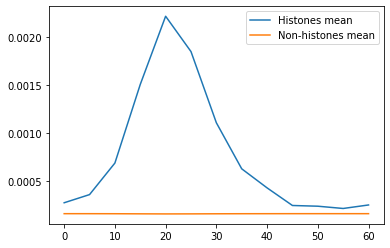

In [38]:
ax = histones_df.mean().plot(logy=False)
non_histones_df.mean().plot(logy=False)
ax.legend(["Histones mean", "Non-histones mean"])

In the time-resolved TRSL model, 20 minutes is exactly at the transition from late G1 to S phase.

### 3.2 Absolute amount of mRNAs

## 4. Histone proteins